In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('churn.csv')

In [3]:
dataframe.head(5)

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 24,tenure_group_25 - 48,tenure_group_49 - 72
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2,2,0,2,53.85,108.15,1,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0
3,3,0,45,42.30,1840.75,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [4]:
dataframe = dataframe.drop('Unnamed: 0',axis=1)

In [5]:
x = dataframe.drop('Churn',axis=1)
x.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 24,tenure_group_25 - 48,tenure_group_49 - 72
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [6]:
y = dataframe['Churn']
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[-0.43515555,  1.61172574,  1.37406508, ..., -0.91126799,
        -0.54137933,  1.46303391],
       [-0.43515555, -1.07635615, -1.47855103, ...,  1.09737202,
        -0.54137933, -0.68351116],
       [-0.43515555, -1.1985417 , -1.02453606, ...,  1.09737202,
        -0.54137933, -0.68351116],
       ...,
       [-0.43515555, -1.23927021, -0.67901731, ...,  1.09737202,
        -0.54137933, -0.68351116],
       [-0.43515555,  1.61172574,  1.33734328, ..., -0.91126799,
        -0.54137933,  1.46303391],
       [-0.43515555, -0.99489913, -1.48522772, ...,  1.09737202,
        -0.54137933, -0.68351116]])

In [10]:
X_test

array([[-0.43515555, -1.03562764,  1.01519296, ...,  1.09737202,
        -0.54137933, -0.68351116],
       [-0.43515555, -0.54688548, -0.84259624, ...,  1.09737202,
        -0.54137933, -0.68351116],
       [-0.43515555, -1.23927021, -0.65731807, ...,  1.09737202,
        -0.54137933, -0.68351116],
       ...,
       [-0.43515555, -0.38397142, -1.50692696, ...,  1.09737202,
        -0.54137933, -0.68351116],
       [-0.43515555, -1.27999872, -1.49357358, ...,  1.09737202,
        -0.54137933, -0.68351116],
       [-0.43515555, -0.9134421 , -0.80921278, ...,  1.09737202,
        -0.54137933, -0.68351116]])

K-Nearest Neighbors Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
Knn_model = KNeighborsClassifier(n_neighbors = 40)
Knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=40)

In [13]:
y_predictKnn = Knn_model.predict(X_test)
y_predictKnn

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(classification_report(Y_test,y_predictKnn))
print(confusion_matrix(Y_test,y_predictKnn))
print('Accuracy : ',accuracy_score(Y_test,y_predictKnn)*100)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1032
           1       0.63      0.58      0.60       377

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

[[902 130]
 [159 218]]
Accuracy :  79.4889992902768


#### As we see that accuracy is low and we also know that the dataset is imbalanced so we will not consider accuracy as a measure
#### So will further check values of precision recall and f1_score for minority class that is for '1' or for 'Churned' customers which we can see is quite low class 1.


Using RandomForest model

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
RF_model = RandomForestClassifier(n_estimators = 200)
RF_model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [17]:
y_predictRF = RF_model.predict(X_test)
y_predictRF

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [18]:
print(classification_report(Y_test,y_predictRF))
print(confusion_matrix(Y_test,y_predictRF))
print('Accuracy : ',accuracy_score(Y_test,y_predictRF)*100)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1032
           1       0.61      0.50      0.55       377

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

[[912 120]
 [187 190]]
Accuracy :  78.21149751596877


#### Using Random Forest also we see quite same result

Using Decision Tree 

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
DT_model = DecisionTreeClassifier(criterion = 'entropy')
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_predictDT = DT_model.predict(X_test)
y_predictDT

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
print(classification_report(Y_test,y_predictDT))
print(confusion_matrix(Y_test,y_predictDT))
print('Accuracy : ',accuracy_score(Y_test,y_predictDT)*100)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1032
           1       0.50      0.49      0.50       377

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

[[848 184]
 [192 185]]
Accuracy :  73.31440738112136


#### Using Desicision Tree we get precision recall and f1-score as around 0.50 which is quite less than KNN and Random Forest

Using SVM

In [23]:
from sklearn import svm

In [24]:
svm_model = svm.SVC()

In [25]:
svm_model.fit(X_train,Y_train)

SVC()

In [26]:
y_predict = svm_model.predict(X_test)
y_predict

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
print(classification_report(Y_test,y_predict))
print(confusion_matrix(Y_test,y_predict))
print('Accuracy : ',accuracy_score(Y_test,y_predict)*100)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1032
           1       0.67      0.51      0.58       377

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[939  93]
 [185 192]]
Accuracy :  80.26969481902059


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [30]:
y_predict = logreg.predict(X_test)
y_predict

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
print(classification_report(Y_test,y_predict))
print(confusion_matrix(Y_test,y_predict))
print('Accuracy : ',accuracy_score(Y_test,y_predict)*100)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1032
           1       0.67      0.55      0.60       377

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

[[932 100]
 [171 206]]
Accuracy :  80.76650106458482


#### In SVM and Logistic Regression we get almost same result

#### So first of all we will convert imbalanced dataset to balanced dataset using UpSampling Method

In [32]:
dataframe['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [33]:
from sklearn.utils import resample

In [34]:
dataframe_majority_0 = dataframe[dataframe.Churn==0] 
dataframe_minority_1 = dataframe[dataframe.Churn==1] 

In [35]:
dataframe_minority_upsampled = resample(dataframe_minority_1,replace=True , n_samples=5174)

In [36]:
dataframe_upsampled = pd.concat([dataframe_majority_0,dataframe_minority_upsampled])
dataframe_upsampled['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [37]:
x=dataframe_upsampled.drop(['Churn'],axis=1)
y=dataframe_upsampled['Churn']

In [38]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 24,tenure_group_25 - 48,tenure_group_49 - 72
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6,0,22,89.10,1949.40,0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
7,0,10,29.75,301.90,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0,3,69.55,222.30,1,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2208,1,1,100.80,100.80,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
2939,1,12,83.80,1029.75,0,1,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3362,0,1,54.90,54.90,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [39]:
y

0       0
1       0
3       0
6       0
7       0
       ..
650     1
2208    1
2939    1
3362    1
6746    1
Name: Churn, Length: 10348, dtype: int64

In [40]:
X_re_train,X_re_test,Y_re_train,Y_re_test = train_test_split(x,y,test_size=0.2)

In [41]:
X_re_train = sc.fit_transform(X_re_train)
X_re_test = sc.transform(X_re_test)

### Retraining the model using KNeighborsClassifier

In [42]:
Knn_re_model = KNeighborsClassifier(n_neighbors=40)
Knn_re_model.fit(X_re_train,Y_re_train)

KNeighborsClassifier(n_neighbors=40)

In [43]:
y_predict_Knn_re_model = Knn_re_model.predict(X_re_test)

In [44]:
print(classification_report(Y_re_test,y_predict_Knn_re_model))
print(confusion_matrix(Y_re_test,y_predict_Knn_re_model))
print('Accuracy : ',accuracy_score(Y_re_test,y_predict_Knn_re_model)*100)

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      1049
           1       0.70      0.83      0.76      1021

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.74      2070
weighted avg       0.75      0.75      0.74      2070

[[691 358]
 [169 852]]
Accuracy :  74.54106280193237


### Retraining the model using RandomForestClassifier

In [46]:
RF_re_model = RandomForestClassifier(n_estimators=200)
RF_re_model.fit(X_re_train,Y_re_train)

RandomForestClassifier(n_estimators=200)

In [47]:
y_predict_RF_re_model = RF_re_model.predict(X_re_test)

In [48]:
print(classification_report(Y_re_test,y_predict_RF_re_model))
print(confusion_matrix(Y_re_test,y_predict_RF_re_model))
print('Accuracy : ',accuracy_score(Y_re_test,y_predict_RF_re_model)*100)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1049
           1       0.86      0.95      0.90      1021

    accuracy                           0.90      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070

[[886 163]
 [ 49 972]]
Accuracy :  89.7584541062802


### Retraining the model using DecisionTree

In [49]:
DT_re_model = DecisionTreeClassifier(criterion = 'gini',splitter='random')
DT_re_model.fit(X_re_train,Y_re_train)

DecisionTreeClassifier(splitter='random')

In [50]:
y_predict_DT_re_model = DT_re_model.predict(X_re_test)

In [51]:
print(classification_report(Y_re_test,y_predict_DT_re_model))
print(confusion_matrix(Y_re_test,y_predict_DT_re_model))
print('Accuracy : ',accuracy_score(Y_re_test,y_predict_DT_re_model)*100)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1049
           1       0.82      0.95      0.88      1021

    accuracy                           0.87      2070
   macro avg       0.88      0.87      0.87      2070
weighted avg       0.88      0.87      0.87      2070

[[842 207]
 [ 56 965]]
Accuracy :  87.29468599033817


### Retraining the model using SVM

In [52]:
SVM_re_model = svm.SVC(probability=True)
SVM_re_model.fit(X_re_train,Y_re_train)

SVC(probability=True)

In [53]:
y_predict_SVM_re_model = SVM_re_model.predict(X_re_test)

In [54]:
print(classification_report(Y_re_test,y_predict_SVM_re_model))
print(confusion_matrix(Y_re_test,y_predict_SVM_re_model))
print('Accuracy : ',accuracy_score(Y_re_test,y_predict_SVM_re_model)*100)

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1049
           1       0.75      0.80      0.77      1021

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

[[779 270]
 [206 815]]
Accuracy :  77.0048309178744


### Retraining the model using Logistic Regression

In [55]:
LogReg_re_model = LogisticRegression()
LogReg_re_model.fit(X_re_train,Y_re_train)

LogisticRegression()

In [56]:
y_predict_LogReg_re_model = LogReg_re_model.predict(X_re_test)

In [57]:
print(classification_report(Y_re_test,y_predict_LogReg_re_model))
print(confusion_matrix(Y_re_test,y_predict_LogReg_re_model))
print('Accuracy : ',accuracy_score(Y_re_test,y_predict_LogReg_re_model)*100)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1049
           1       0.75      0.79      0.77      1021

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070

[[776 273]
 [217 804]]
Accuracy :  76.32850241545893


#### After balancing the data set we again trained the model using various alogrithim 
#### KNN gave us the accuracy of 75%  with good precision recall and f1-score
#### Decision tree also gave  the accuracy of 87%  with good precision recall and f1-score
#### SVM gave the accuracy of 78%  with good precision recall and f1-score
#### But in all the algorithim Random Forest showed the  best result with accuracy of 89% and almost best precision recall and f1-score among the other algorithim


### So here we decide to build our model using Random Forest as it gave best result

## AUC_ROC curve

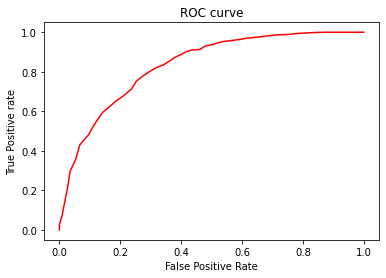

In [58]:
pred_proba_Knn = Knn_re_model.predict_proba(X_re_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(Y_re_test, pred_proba_Knn[:,1], pos_label=1)
plt.plot(fpr, tpr,color='red', label='KNN')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

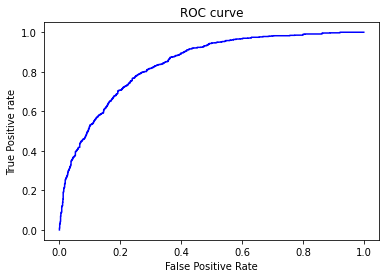

In [59]:
pred_proba_logreg = LogReg_re_model.predict_proba(X_re_test)
fpr, tpr, thresh = roc_curve(Y_re_test, pred_proba_logreg[:,1], pos_label=1)
plt.plot(fpr, tpr,color='blue', label='Logistic Regression')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

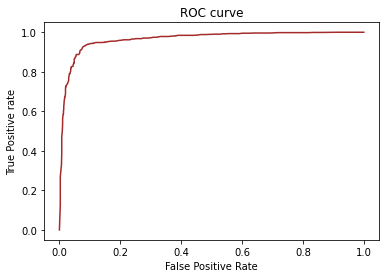

In [60]:
pred_probaRDForest = RF_re_model.predict_proba(X_re_test)
fpr,tpr,thresh=roc_curve(Y_re_test,pred_probaRDForest[:,1])
plt.plot(fpr,tpr,color = 'brown',label='Random Forest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

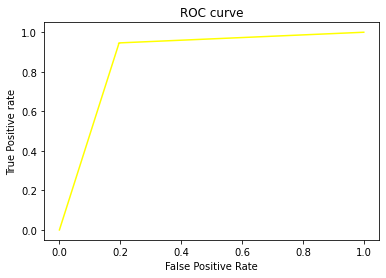

In [61]:
pred_probaDTree = DT_re_model.predict_proba(X_re_test)
fpr,tpr,thresh=roc_curve(Y_re_test,pred_probaDTree[:,1])
plt.plot(fpr,tpr,color = 'yellow',label='Decision Tree')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

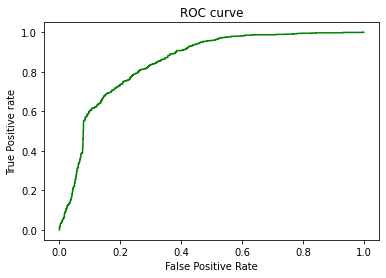

In [63]:
pred_probaSVM = SVM_re_model.predict_proba(X_re_test)
fpr,tpr,thresh=roc_curve(Y_re_test,pred_probaSVM[:,1])
plt.plot(fpr,tpr,color = 'green',label='Random Forest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

### Using AUC-ROC curve also we got the insight that randomforest model is predicting the values correctly as compared to other models.

### Here we will save our final selected model i.e random forest model in the file.

In [64]:
import pickle

In [65]:
name='RDForest_model.sav'

In [66]:
pickle.dump(RF_re_model, open(name, 'wb'))